In [5]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

In [6]:
df = pd.read_csv("data/heart.csv")
target = "TenYearCHD"

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

def plotROCs(results):
    ''' Funkcja, do rysowania szeregu wyników krzywych ROC dla poszczególnych eksperymentów
    results - lista wyników jako 3 elementowe tuple (true, pred, label)
    '''
    
    # Ustalanie wielkości rysunku
    fig, ax = plt.subplots(figsize=(10,9))
        
    for true, pred, label in results:
        # Obliczenie punktów potrzebnych do narysowani akrzywej ROC
        # funkcja roc_curve zwarca trzy serie danych, fpr, tpr oraz poziomy progów odcięcia
        fpr, tpr, thresholds = roc_curve(true, pred)
        # Obliczamy pole powierzchni pod krzywą
        rocScore = roc_auc_score(true, pred)
        rocScore = round(rocScore, 3)
    
        # Grubość krzywej
        lw = 2

        # Rysujemy krzywą ROC
        ax.plot(fpr, tpr, lw=lw, label=f'{label}: {rocScore}')
    # Rysujemy krzywą 45 stopni jako punkt odniesienia
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    # Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic - {rocScore}')
    ax.legend(loc="lower right")
    plt.show()

---

In [8]:
with open("model_ekonometria_1.p", "rb") as fp:
    modelEkonometria = pickle.load(fp)

with open("model_RF_1.p", "rb") as fp:
    modelRF = pickle.load(fp)

with open("model_RF_1_rs.p", "rb") as fp:
    modelRF_rs = pickle.load(fp)
    
with open("model_XGB_1.p", "rb") as fp:
    modelXGB = pickle.load(fp)
    
with open("model_XGB_1_rs.p", "rb") as fp:
    modelXGB_rs = pickle.load(fp)    
    
with open("model_ANN_1.p", "rb") as fp:
    modelANN = pickle.load(fp)

with open("model_SVM_1.p", "rb") as fp:
    modelSVM = pickle.load(fp)    

with open("model_kNN_1.p", "rb") as fp:
    modelKNN = pickle.load(fp)        

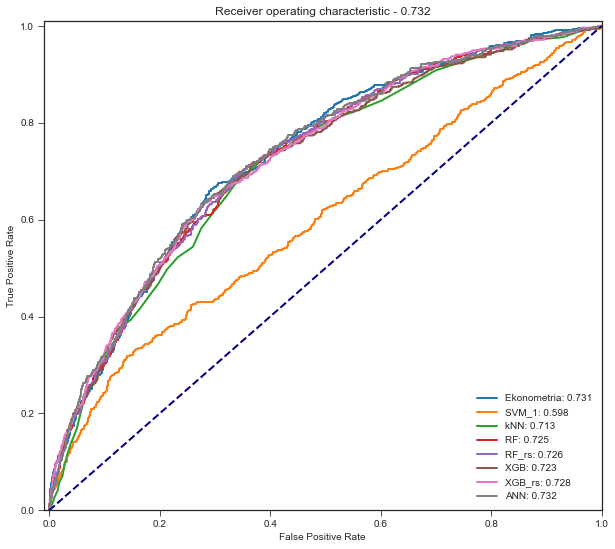

In [9]:
res2plot = []
true = (df[target]==1).sort_index()
for result in [modelEkonometria, modelSVM, modelKNN, modelRF, modelRF_rs, modelXGB, modelXGB_rs, modelANN]:
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
plotROCs(res2plot)